
Raimundo Burchardt Student Number: 1779575 Master: Data-Driven-Design


# USER TESTING SECOND ITERATION 
## Evalution of UX, UI and recommendation system


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go
import numpy as np

In [2]:
#import survey dataset link to survey: https://docs.google.com/forms/d/e/1FAIpQLSeCqjBjMpi3tJHYYcaW5lJmXXDW7s_5TdM_5wP5s9IqB8eSYQ/viewform

In [3]:
df1 = pd.read_csv('user_test2.csv')

## DATA CLEANING


A first approach to Data Cleaning is to observe how the dataset looks like. For this we will preview the data with .head() and .info() to get general insights about the type of data we are working with and other aspects that might be relevant

In [4]:
df1.head()

,Timestamp,How relevant were the asked questions during the registration for generating the best possible mentor - mentee match?,How would you rate the flow of the interface? I.e. How easy was for you to accomplish each of the assigned tasks?,How accurate was the recommendation you received based on your given datapoints,How would you rate the User Interface as a whole?,How would you rate the proposed solution to help connect mentors and mentees across the globe?
0,2021/08/11 4:42:09 pm EET,4,5,4,4,4
1,2021/08/11 5:50:00 pm EET,5,5,3,4,4
2,2021/08/12 1:15:20 pm EET,4,5,5,4,4
3,2021/08/12 3:22:31 pm EET,5,5,3,5,5
4,2021/08/14 4:39:43 pm EET,4,5,4,4,5


In [5]:
# show the type of data we are going to be working with
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Timestamp                                                                                                              5 non-null      object
 1   How relevant were the asked questions during the registration for generating the best possible mentor - mentee match?  5 non-null      int64 
 2   How would you rate the flow of the interface? I.e. How easy was for you to accomplish each of the assigned tasks?      5 non-null      int64 
 3   How accurate was the recommendation you received based on your given datapoints                                        5 non-null      int64 
 4   How would you

It must be noted that analyzing an application could be very subjective, however with different data points about user´s perception of an app we can get an overview of how weel does the app performs. 
With this in mind and after doing literature research, three key  insights were defined to measure users perception relevance and the UI, UX & functionalities of the interface. These would be asked directly to the users after the user tesitng:
- 1) How would you rate the User Interface as a whole = ui_score
- 2)  How would you rate the flow of the interface? I.e. How easy was for you to accomplish each of the assigned tasks? = flow_score  
- 3)  How accurate was the recommendation you received based on your given datapoints = recommendation_score
- 4) How would you rate the proposed solution to help connect mentors and mentees across the globe? : app_relevance


In [6]:
#make variable for renaming col_names 

In [7]:
col_names = {'How relevant were the asked questions during the registration for generating the best possible mentor - mentee match?' : 'questions_importance', 'How would you rate the flow of the interface? I.e. How easy was for you to accomplish each of the assigned tasks?' : 'flow_score', 'How accurate was the recommendation you received based on your given datapoints' : 'recom_score', 'How would you rate the User Interface as a whole?': 'ui_score', 'How would you rate the proposed solution to help connect mentors and mentees across the globe?' : 'app_relevance'}

In [8]:
#create new df with renamed col_names
df = df1.rename(columns=col_names)
#drop time stamp
df = df.drop(["Timestamp"], axis=1)

In [9]:
df.head()

,questions_importance,flow_score,recom_score,ui_score,app_relevance
0,4,5,4,4,4
1,5,5,3,4,4
2,4,5,5,4,4
3,5,5,3,5,5
4,4,5,4,4,5


## General insights from Data

When analazyng Data, it is very helpful to get a quick overview of the numerical values in question. In this case the User Experience will be analyzed with the numerical parameters stablished before.
With .describe() its possible to get immediately relevant insights about the distribution of values.
The mean indicates the average of the obtained values
The standard deviation indicates how far is each value from the mean.
The min and max shows the lowest and highest value of the data.


In [10]:
df.describe()

,questions_importance,flow_score,recom_score,ui_score,app_relevance
count,5.000000,5.0,5.00000,5.000000,5.000000
mean,4.400000,5.0,3.80000,4.200000,4.400000
std,0.547723,0.0,0.83666,0.447214,0.547723
min,4.000000,5.0,3.00000,4.000000,4.000000
25%,4.000000,5.0,3.00000,4.000000,4.000000
50%,4.000000,5.0,4.00000,4.000000,4.000000
75%,5.000000,5.0,4.00000,4.000000,5.000000
max,5.000000,5.0,5.00000,5.000000,5.000000


User´s perception of User Interface was measured by **four** factors based on users interaction with the app.

- 1) **UI Score (User Interface Score)**: Rates how relevant is the app layout for their purposes within the app. A higher value means that its very important.
- 2) **Flow Score**: Navigation easiness within app. It seeks to find if users can navigate easily towards finding what they are looking within the app 
- 3) **recomm_score**: accuracy of recommendations. 
- 4) **app_relevance**: general perception of app
 
 Users were asked to rate from 1 to 5 these three key functionalitites of the prototype.


In [11]:
df.corr()

,questions_importance,flow_score,recom_score,ui_score,app_relevance
questions_importance,1.000000,NaN,-0.872872,0.612372,0.166667
flow_score,NaN,NaN,NaN,NaN,NaN
recom_score,-0.872872,NaN,1.000000,-0.534522,-0.327327
ui_score,0.612372,NaN,-0.534522,1.000000,0.612372
app_relevance,0.166667,NaN,-0.327327,0.612372,1.000000


<Figure size 432x288 with 0 Axes>

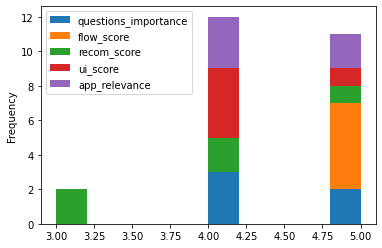

In [12]:
#Stacked chart of scores
plt.figure();
df.plot.hist(stacked=True, bins=10);

C:\Users\raimu\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


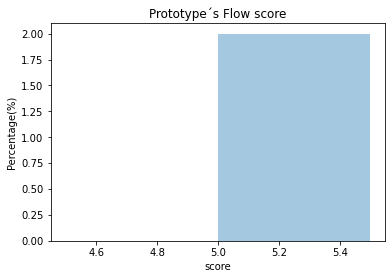

In [13]:
sns.distplot(df['flow_score'], kde=True)
plt.title('Prototype´s Flow score')
plt.xlabel('score')
plt.ylabel('Percentage(%)')
plt.show()

C:\Users\raimu\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


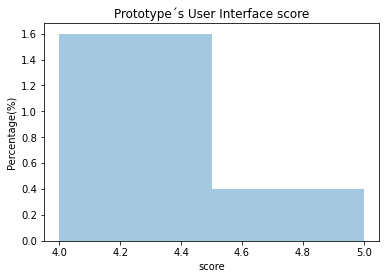

In [14]:
sns.distplot(df['ui_score'], kde=True)
plt.title('Prototype´s User Interface score')
plt.xlabel('score')
plt.ylabel('Percentage(%)')
plt.show()

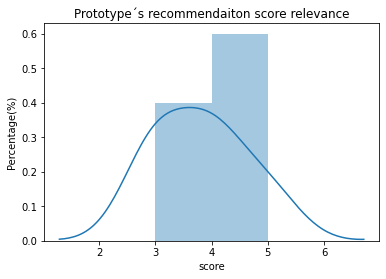

In [15]:
sns.distplot(df['recom_score'], kde=True)
plt.title('Prototype´s recommendaiton score relevance')
plt.xlabel('score')
plt.ylabel('Percentage(%)')
plt.show()

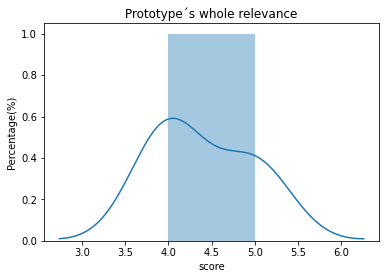

In [16]:
sns.distplot(df['app_relevance'], kde=True)
plt.title('Prototype´s whole relevance')
plt.xlabel('score')
plt.ylabel('Percentage(%)')
plt.show()